# I will like to evaluate the features and CF_based features a liitle more from different angles. As well as test the idea that combine rank of features and rank of similarity together.

In [1]:
import pandas as pd
import numpy as np
import os
import scipy as sp
from sklearn.metrics.pairwise import cosine_similarity
import operator
import cv2
import glob
from keras.preprocessing import image
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Using TensorFlow backend.


In [2]:
os.chdir('/Users/Walkon302/Desktop/deep-learning-models-master/view2buy')

In [96]:
df = pd.read_pickle('view2buy_url_CF_user_buy.pkl')

In [97]:
df.head()

,0,user_id,buy_spu,buy_sn,buy_ct3,view_spu,view_sn,view_ct3,time_interval,view_cnt,view_secondes,view_features,buy_features,spu,url,user_buy,CF_item
0,4209887493\t453532580309307392\t10004616\t334\...,4209887493,453532580309307392,10004616,334,14150170026959126,10010102,334,21114,1,11,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.1, 1.804, 0.049, 0.883, 0.092, 0.053, 0.042...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...,4209887493-453532580309307392,"[82267097285177879, 12742773141631009, 8883989..."
1,529805243\t103096245561765919\t10010102\t334\t...,529805243,103096245561765919,10010102,334,14150170026959126,10010102,334,37794,4,66,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.467, 0.385, 0.0, 0.043, 0.292, 0.0, 0.448, ...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...,529805243-103096245561765919,"[82267097285177879, 12742773141631009, 8883989..."
2,3748045464\t446777176556679168\t10005711\t334\...,3748045464,446777176556679168,10005711,334,14150170026959126,10010102,334,18820,1,34,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.018, 0.161, 0.088, 0.141, 0.231, 0.0, 0.036...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...,3748045464-446777176556679168,"[82267097285177879, 12742773141631009, 8883989..."
3,4209887493\t438895881520357521\t10004616\t334\...,4209887493,438895881520357521,10004616,334,14150170026959126,10010102,334,13978,1,11,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.036, 0.439, 0.0, 0.074, 0.194, 0.0, 0.331, ...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...,4209887493-438895881520357521,"[82267097285177879, 12742773141631009, 8883989..."
4,4209887493\t74104320184119307\t10004616\t334\t...,4209887493,74104320184119307,10004616,334,14150170026959126,10010102,334,14313,1,11,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.078, 2.304, 0.132, 0.191, 0.0, 0.087, 0.341...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...,4209887493-74104320184119307,"[82267097285177879, 12742773141631009, 8883989..."


In [89]:
df2 = pd.read_pickle('view2buy_url_CF.pkl')

In [90]:
df2.head()

,0,user_id,buy_spu,buy_sn,buy_ct3,view_spu,view_sn,view_ct3,time_interval,view_cnt,view_secondes,view_features,buy_features,spu,url,CF_item
0,4209887493\t453532580309307392\t10004616\t334\...,4209887493,453532580309307392,10004616,334,14150170026959126,10010102,334,21114,1,11,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.1, 1.804, 0.049, 0.883, 0.092, 0.053, 0.042...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[82267097285177879, 12742773141631009, 3341747..."
1,529805243\t103096245561765919\t10010102\t334\t...,529805243,103096245561765919,10010102,334,14150170026959126,10010102,334,37794,4,66,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.467, 0.385, 0.0, 0.043, 0.292, 0.0, 0.448, ...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[82267097285177879, 12742773141631009, 3341747..."
2,3748045464\t446777176556679168\t10005711\t334\...,3748045464,446777176556679168,10005711,334,14150170026959126,10010102,334,18820,1,34,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.018, 0.161, 0.088, 0.141, 0.231, 0.0, 0.036...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[82267097285177879, 12742773141631009, 3341747..."
3,4209887493\t438895881520357521\t10004616\t334\...,4209887493,438895881520357521,10004616,334,14150170026959126,10010102,334,13978,1,11,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.036, 0.439, 0.0, 0.074, 0.194, 0.0, 0.331, ...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[82267097285177879, 12742773141631009, 3341747..."
4,4209887493\t74104320184119307\t10004616\t334\t...,4209887493,74104320184119307,10004616,334,14150170026959126,10010102,334,14313,1,11,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.078, 2.304, 0.132, 0.191, 0.0, 0.087, 0.341...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[82267097285177879, 12742773141631009, 3341747..."


In [86]:
df[df['user_id']== 4209887493].columns

Index([u'0', u'user_id', u'buy_spu', u'buy_sn', u'buy_ct3', u'view_spu',
       u'view_sn', u'view_ct3', u'time_interval', u'view_cnt',
       u'view_secondes', u'view_features_x', u'buy_features', u'spu', u'url',
       u'CF_item_x', u'CF_item_y', u'ave_CF_fea_x', u'user_features',
       u'CF_sim', u'CF_rank', u'ori_user_features', u'ori_sim', u'ori_rank'],
      dtype='object')

In [77]:
df.drop(['0', 'CF_item_y', 'user_features', 'CF_sim', 'CF_rank', 'ori_user_features', 'ori_sim', 'ori_rank'], axis = 1)

,user_id,buy_spu,buy_sn,buy_ct3,view_spu,view_sn,view_ct3,time_interval,view_cnt,view_secondes,view_features_x,buy_features,spu,url,CF_item_x,ave_CF_fea_x
0,4209887493,453532580309307392,10004616,334,14150170026959126,10010102,334,21114,1,11,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.1, 1.804, 0.049, 0.883, 0.092, 0.053, 0.042...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[82267097285177879, 12742773141631009, 3341747...","[0.5528, 1.3589, 0.0329, 0.2652, 0.1121, 0.070..."
1,4209887493,438895881520357521,10004616,334,14150170026959126,10010102,334,13978,1,11,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.036, 0.439, 0.0, 0.074, 0.194, 0.0, 0.331, ...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[82267097285177879, 12742773141631009, 3341747...","[0.5528, 1.3589, 0.0329, 0.2652, 0.1121, 0.070..."
2,4209887493,74104320184119307,10004616,334,14150170026959126,10010102,334,14313,1,11,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.078, 2.304, 0.132, 0.191, 0.0, 0.087, 0.341...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[82267097285177879, 12742773141631009, 3341747...","[0.5528, 1.3589, 0.0329, 0.2652, 0.1121, 0.070..."
3,4209887493,453532580309307392,10004616,334,99155636687355977,10023064,334,18202,1,22,"[0.349, 0.394, 0.007, 2.666, 0.009, 0.0, 0.0, ...","[0.1, 1.804, 0.049, 0.883, 0.092, 0.053, 0.042...",99155636687355977,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[438895881520357521, 74104320184119307, 443680...","[0.146, 0.7319, 0.0257, 0.6735, 0.1741, 0.0252..."
4,4209887493,438895881520357521,10004616,334,99155636687355977,10023064,334,11066,1,22,"[0.349, 0.394, 0.007, 2.666, 0.009, 0.0, 0.0, ...","[0.036, 0.439, 0.0, 0.074, 0.194, 0.0, 0.331, ...",99155636687355977,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[438895881520357521, 74104320184119307, 443680...","[0.146, 0.7319, 0.0257, 0.6735, 0.1741, 0.0252..."
5,4209887493,74104320184119307,10004616,334,99155636687355977,10023064,334,11401,1,22,"[0.349, 0.394, 0.007, 2.666, 0.009, 0.0, 0.0, ...","[0.078, 2.304, 0.132, 0.191, 0.0, 0.087, 0.341...",99155636687355977,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[438895881520357521, 74104320184119307, 443680...","[0.146, 0.7319, 0.0257, 0.6735, 0.1741, 0.0252..."
6,4209887493,453532580309307392,10004616,334,82548613061427358,10023064,334,18053,2,10,"[0.261, 1.139, 0.074, 2.173, 0.081, 0.0, 0.158...","[0.1, 1.804, 0.049, 0.883, 0.092, 0.053, 0.042...",82548613061427358,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[438895881520357521, 74104320184119307, 443680...","[0.146, 0.7319, 0.0257, 0.6735, 0.1741, 0.0252..."
7,4209887493,438895881520357521,10004616,334,82548613061427358,10023064,334,10917,2,10,"[0.261, 1.139, 0.074, 2.173, 0.081, 0.0, 0.158...","[0.036, 0.439, 0.0, 0.074, 0.194, 0.0, 0.331, ...",82548613061427358,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[438895881520357521, 74104320184119307, 443680...","[0.146, 0.7319, 0.0257, 0.6735, 0.1741, 0.0252..."
8,4209887493,74104320184119307,10004616,334,82548613061427358,10023064,334,11252,2,10,"[0.261, 1.139, 0.074, 2.173, 0.081, 0.0, 0.158...","[0.078, 2.304, 0.132, 0.191, 0.0, 0.087, 0.341...",82548613061427358,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[438895881520357521, 74104320184119307, 443680...","[0.146, 0.7319, 0.0257, 0.6735, 0.1741, 0.0252..."
9,4209887493,453532580309307392,10004616,334,74104320184119307,10004616,334,6801,10,62,"[0.078, 2.304, 0.132, 0.191, 0.0, 0.087, 0.341...","[0.1, 1.804, 0.049, 0.883, 0.092, 0.053, 0.042...",74104320184119307,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[438895881520357521, 74104320184119307, 443680...","[0.146, 0.7319, 0.0257, 0.6735, 0.1741, 0.0252..."


In [119]:
df_buy_user = df.groupby(['user_id', 'buy_spu', 'spu']).count().reset_index()[['user_id', 'buy_spu', 'spu']]

In [120]:
df_buy_user.shape

(15785, 3)

In [124]:
df_buy_user.head()

,user_id,buy_spu,spu
0,3440325,2898705571343994880,952306123355361280
1,3440325,2898705571343994880,1374237151951519744
2,3440325,2898705571343994880,1392814500414361602
3,3440325,2898705571343994880,2462700831731142656
4,3440325,2898705571343994880,2462982307401474048


In [30]:
df_spu = pd.read_pickle('spu_CF_features.pkl')

In [31]:
df_spu.head()

,spu,CF_item,spu_features,CF_features,ave_CF_fea
0,357872333107204,"[8952950888272863232, 1664156381170176000, 284...","[0.035, 0.385, 0.112, 0.014, 0.0, 0.123, 0.438...","[[[0.462, 0.551, 0.068, 0.833, 0.0, 0.0, 0.0, ...","[0.4269, 0.6321, 0.101, 0.9695, 0.2211, 0.131,..."
1,357875526680651,"[2046769978417582, 461413925257830545, 3255052...","[0.132, 1.678, 0.061, 0.918, 0.462, 0.342, 0.4...","[[[0.357, 2.503, 0.0, 0.641, 0.143, 0.0, 0.104...","[0.4727, 0.8078, 0.0697, 0.5796, 0.3075, 0.009..."
2,357882254983171,"[459725075493814272, 8582811288237465674, 1976...","[0.026, 0.936, 0.056, 0.614, 0.139, 0.0, 0.302...","[[[1.884, 0.52, 0.0, 3.98, 0.175, 0.008, 0.663...","[0.6206, 0.8754, 0.1066, 0.7549, 0.2387, 0.186..."
3,357901107539985,"[2466922956389351424, 8459806721299259392, 780...","[0.229, 0.543, 0.132, 0.144, 0.295, 0.018, 0.0...","[[[0.124, 0.819, 0.0, 0.596, 0.306, 0.043, 0.2...","[0.4016, 0.6379, 0.2088, 0.7764, 0.3335, 0.012..."
4,639360131194904,"[451843765076328474, 81141212316332372, 320394...","[1.113, 0.5, 0.758, 0.218, 0.0, 0.0, 0.335, 1....","[[[0.501, 0.12, 0.0, 0.0, 0.23, 0.108, 0.377, ...","[0.2916, 0.5296, 0.0964, 0.3321, 0.1873, 0.022..."


In [14]:
def dot(K, L):
    if len(K) != len(L): return 0
    return sum(i[0]*i[1] for i in zip(K, L))

def similarity(item_1, item_2):
    return dot(item_1, item_2) / np.sqrt(dot(item_1, item_1)*dot(item_2, item_2))

def average(lists):
    return [np.mean(i) for i in zip(*[l for l in lists])]

In [138]:
CF_user_fea = df_cal.groupby(['user_id', 'buy_spu'])['ave_CF_fea'].apply(lambda x: average(x))
CF_user_fea = pd.DataFrame(CF_user_fea)
CF_user_fea = CF_user_fea.reset_index()

In [139]:
Ori_user_fea = df_cal.groupby(['user_id', 'buy_spu'])['spu_features'].apply(lambda x: average(x))
Ori_user_fea = pd.DataFrame(Ori_user_fea)
Ori_user_fea = Ori_user_fea.reset_index()

In [158]:
CF_user_fea.head()

,user_id,buy_spu,ave_CF_fea
0,3440325,2898705571343994880,"[0.327609375, 0.573775, 0.11804375, 0.87390625..."
1,7052311,7957699990364366,"[0.307052173913, 0.738013043478, 0.06435217391..."
2,7052311,299847271351230626,"[0.306652173913, 0.7439, 0.0624434782609, 0.60..."
3,7052311,448747521265074449,"[0.306817391304, 0.735182608696, 0.06435217391..."
4,9254280,3925244893201649664,"[0.385093939394, 0.623651515152, 0.12763030303..."


# Now I got the correct user_features either based on original features or CF_based features for each user per perchase.

In [5]:
user_fea = pd.read_pickle('user_buy_CF_Ori_fea.pkl')
df_spu = pd.read_pickle('spu_CF_features.pkl')

In [169]:
user_fea.head()

,user_id,buy_spu,ave_CF_fea,ave_view_fea
0,3440325,2898705571343994880,"[0.327609375, 0.573775, 0.11804375, 0.87390625...","[0.30521875, 0.5995625, 0.167625, 0.99259375, ..."
1,7052311,7957699990364366,"[0.307052173913, 0.738013043478, 0.06435217391...","[0.320739130435, 0.577217391304, 0.088, 0.6661..."
2,7052311,299847271351230626,"[0.306652173913, 0.7439, 0.0624434782609, 0.60...","[0.314217391304, 0.620695652174, 0.08865217391..."
3,7052311,448747521265074449,"[0.306817391304, 0.735182608696, 0.06435217391...","[0.323086956522, 0.60552173913, 0.088, 0.653, ..."
4,9254280,3925244893201649664,"[0.385093939394, 0.623651515152, 0.12763030303...","[0.356484848485, 0.575484848485, 0.11351515151..."


In [171]:
df_spu.head()

,spu,CF_item,spu_features,CF_features,ave_CF_fea
0,357872333107204,"[8952950888272863232, 1664156381170176000, 284...","[0.035, 0.385, 0.112, 0.014, 0.0, 0.123, 0.438...","[[[0.462, 0.551, 0.068, 0.833, 0.0, 0.0, 0.0, ...","[0.4269, 0.6321, 0.101, 0.9695, 0.2211, 0.131,..."
1,357875526680651,"[2046769978417582, 461413925257830545, 3255052...","[0.132, 1.678, 0.061, 0.918, 0.462, 0.342, 0.4...","[[[0.357, 2.503, 0.0, 0.641, 0.143, 0.0, 0.104...","[0.4727, 0.8078, 0.0697, 0.5796, 0.3075, 0.009..."
2,357882254983171,"[459725075493814272, 8582811288237465674, 1976...","[0.026, 0.936, 0.056, 0.614, 0.139, 0.0, 0.302...","[[[1.884, 0.52, 0.0, 3.98, 0.175, 0.008, 0.663...","[0.6206, 0.8754, 0.1066, 0.7549, 0.2387, 0.186..."
3,357901107539985,"[2466922956389351424, 8459806721299259392, 780...","[0.229, 0.543, 0.132, 0.144, 0.295, 0.018, 0.0...","[[[0.124, 0.819, 0.0, 0.596, 0.306, 0.043, 0.2...","[0.4016, 0.6379, 0.2088, 0.7764, 0.3335, 0.012..."
4,639360131194904,"[451843765076328474, 81141212316332372, 320394...","[1.113, 0.5, 0.758, 0.218, 0.0, 0.0, 0.335, 1....","[[[0.501, 0.12, 0.0, 0.0, 0.23, 0.108, 0.377, ...","[0.2916, 0.5296, 0.0964, 0.3321, 0.1873, 0.022..."


In [47]:
user_fea['ave_Ori_sim_rank']= user_fea.apply(lambda x: sim_cal(x['buy_spu'],x['ave_view_fea']), axis = 1)

2898705571343994880
7957699990364366
299847271351230626
448747521265074449
3925244893201649664
453532609002410015
4420359388939563031
25690665644495446
4766573611946106883
2823270277605580800
2909964570461929472
4411070714708987927
6926894069614792705
2482122605837119488
2886883622319759360
2913060795180240896
2823270277605580800
2832277476150169600
24001769421647872
2896735246507962368
314483964450287810
1392814500414406660
4397841390802718742
2463545257346113536
7804814445850251264
4070767462512406529
6926894069614792705
2895890821597048832
2474241306483101696
4210379050958020608
2457352807885774848
7018373437045764097
6787001004303990784
4131566057481908225
4612888274761371649
25690661432709125
301817568529408000
4401500565499949068
80015314527277239
290840078882562181
2484655880651984896
449591938442985580
454095538070356542
8664720590950785055
447621605798383646
13868682270638081
2615260342006214656
2829462726381260800
2913060795180240896
2913905219381506048
2481559655864078338
46

In [4]:
# Calculate similarity and ranking, return the final result for each buy item.
def sim_cal(buy_item, item):
    df_spu['sim'] = df_spu.apply(lambda x: similarity(x['spu_features'], item), axis = 1)
    df_spu['rank'] = df_spu['sim'].rank(ascending=False)
    print user
    return (df_spu[df_spu['spu'] == buy_item]['sim'], df_spu[df_spu['spu'] == buy_item]['rank'])

In [38]:
df_spu.head()

,spu,CF_item,spu_features,CF_features,ave_CF_fea,sim,rank
0,357872333107204,"[8952950888272863232, 1664156381170176000, 284...","[0.035, 0.385, 0.112, 0.014, 0.0, 0.123, 0.438...","[[[0.462, 0.551, 0.068, 0.833, 0.0, 0.0, 0.0, ...","[0.4269, 0.6321, 0.101, 0.9695, 0.2211, 0.131,...",0.787449,632.0
1,357875526680651,"[2046769978417582, 461413925257830545, 3255052...","[0.132, 1.678, 0.061, 0.918, 0.462, 0.342, 0.4...","[[[0.357, 2.503, 0.0, 0.641, 0.143, 0.0, 0.104...","[0.4727, 0.8078, 0.0697, 0.5796, 0.3075, 0.009...",0.690612,1561.0
2,357882254983171,"[459725075493814272, 8582811288237465674, 1976...","[0.026, 0.936, 0.056, 0.614, 0.139, 0.0, 0.302...","[[[1.884, 0.52, 0.0, 3.98, 0.175, 0.008, 0.663...","[0.6206, 0.8754, 0.1066, 0.7549, 0.2387, 0.186...",0.754448,965.0
3,357901107539985,"[2466922956389351424, 8459806721299259392, 780...","[0.229, 0.543, 0.132, 0.144, 0.295, 0.018, 0.0...","[[[0.124, 0.819, 0.0, 0.596, 0.306, 0.043, 0.2...","[0.4016, 0.6379, 0.2088, 0.7764, 0.3335, 0.012...",0.692096,1544.0
4,639360131194904,"[451843765076328474, 81141212316332372, 320394...","[1.113, 0.5, 0.758, 0.218, 0.0, 0.0, 0.335, 1....","[[[0.501, 0.12, 0.0, 0.0, 0.23, 0.108, 0.377, ...","[0.2916, 0.5296, 0.0964, 0.3321, 0.1873, 0.022...",0.665405,1752.0


In [34]:
df_spu.head()

,spu,CF_item,spu_features,CF_features,ave_CF_fea,sim,rank
0,357872333107204,"[8952950888272863232, 1664156381170176000, 284...","[0.035, 0.385, 0.112, 0.014, 0.0, 0.123, 0.438...","[[[0.462, 0.551, 0.068, 0.833, 0.0, 0.0, 0.0, ...","[0.4269, 0.6321, 0.101, 0.9695, 0.2211, 0.131,...",0.787449,632.0
1,357875526680651,"[2046769978417582, 461413925257830545, 3255052...","[0.132, 1.678, 0.061, 0.918, 0.462, 0.342, 0.4...","[[[0.357, 2.503, 0.0, 0.641, 0.143, 0.0, 0.104...","[0.4727, 0.8078, 0.0697, 0.5796, 0.3075, 0.009...",0.690612,1561.0
2,357882254983171,"[459725075493814272, 8582811288237465674, 1976...","[0.026, 0.936, 0.056, 0.614, 0.139, 0.0, 0.302...","[[[1.884, 0.52, 0.0, 3.98, 0.175, 0.008, 0.663...","[0.6206, 0.8754, 0.1066, 0.7549, 0.2387, 0.186...",0.754448,965.0
3,357901107539985,"[2466922956389351424, 8459806721299259392, 780...","[0.229, 0.543, 0.132, 0.144, 0.295, 0.018, 0.0...","[[[0.124, 0.819, 0.0, 0.596, 0.306, 0.043, 0.2...","[0.4016, 0.6379, 0.2088, 0.7764, 0.3335, 0.012...",0.692096,1544.0
4,639360131194904,"[451843765076328474, 81141212316332372, 320394...","[1.113, 0.5, 0.758, 0.218, 0.0, 0.0, 0.335, 1....","[[[0.501, 0.12, 0.0, 0.0, 0.23, 0.108, 0.377, ...","[0.2916, 0.5296, 0.0964, 0.3321, 0.1873, 0.022...",0.665405,1752.0


In [221]:
a = sim_cal(3440325, user_fea['ave_CF_fea'][0])

3440325


In [18]:
df_spu

,user_id,view_spu,spu,CF_item,spu_features_x,CF_features,ave_CF_fea_x,CF_user_features,Ori_user_features
0,3440325,952306123355361280,952306123355361280,"[2626800816051441664, 107318408860868627, 8886...","[0.631, 1.654, 0.0, 0.253, 0.041, 0.0, 0.103, ...","[[[0.392, 0.326, 0.0, 0.076, 0.171, 0.009, 0.0...","[0.4213, 0.6232, 0.2287, 0.7885, 0.1946, 0.047...","[0.327609375, 0.573775, 0.11804375, 0.87390625...","[0.30521875, 0.5995625, 0.167625, 0.99259375, ..."
1,3440325,1374237151951519744,1374237151951519744,"[3773248405777813504, 2452849208253480960, 570...","[0.276, 0.458, 0.0, 0.234, 0.062, 0.023, 0.458...","[[[0.166, 0.366, 0.0, 0.075, 0.058, 0.294, 0.5...","[0.2671, 0.4109, 0.0948, 0.6352, 0.1639, 0.120...","[0.327609375, 0.573775, 0.11804375, 0.87390625...","[0.30521875, 0.5995625, 0.167625, 0.99259375, ..."
2,3440325,1392814500414361602,1392814500414361602,"[18935228309520387, 2531099323969781760, 24694...","[1.066, 0.992, 0.004, 0.868, 0.169, 0.389, 0.1...","[[[0.902, 0.444, 0.0, 0.236, 0.075, 0.259, 0.3...","[0.4135, 0.4454, 0.0279, 1.3677, 0.2129, 0.093...","[0.327609375, 0.573775, 0.11804375, 0.87390625...","[0.30521875, 0.5995625, 0.167625, 0.99259375, ..."
3,3440325,2462700831731142656,2462700831731142656,"[2825803552328679424, 1397036625065005056, 290...","[0.2, 0.231, 0.302, 0.536, 0.064, 0.0, 0.261, ...","[[[0.318, 0.811, 0.003, 0.248, 0.016, 0.016, 0...","[0.5295, 0.539, 0.1045, 0.9142, 0.1462, 0.0491...","[0.327609375, 0.573775, 0.11804375, 0.87390625...","[0.30521875, 0.5995625, 0.167625, 0.99259375, ..."
4,3440325,2462982307401474048,2462982307401474048,"[2478463431161782272, 2813981603399778304, 284...","[0.177, 0.029, 0.036, 0.558, 0.393, 0.059, 0.2...","[[[0.146, 0.576, 0.498, 1.403, 0.082, 0.009, 0...","[0.1984, 0.5322, 0.296, 1.4349, 0.4927, 0.0944...","[0.327609375, 0.573775, 0.11804375, 0.87390625...","[0.30521875, 0.5995625, 0.167625, 0.99259375, ..."
5,3440325,2467767382049587200,2467767382049587200,"[4048530939349401602, 4418107589125877775, 439...","[0.0, 0.345, 0.464, 1.119, 0.452, 0.0, 0.162, ...","[[[0.173, 0.102, 0.096, 0.694, 0.017, 0.062, 0...","[0.4394, 1.0768, 0.1263, 0.7698, 0.3109, 0.124...","[0.327609375, 0.573775, 0.11804375, 0.87390625...","[0.30521875, 0.5995625, 0.167625, 0.99259375, ..."
6,3440325,2474241305768906752,2474241305768906752,"[7016121635473047552, 1764924422095110144, 116...","[0.146, 0.976, 0.109, 0.529, 0.063, 0.0, 0.151...","[[[0.479, 0.745, 0.0, 2.47, 0.097, 0.066, 0.01...","[0.2691, 0.6029, 0.0289, 0.5591, 0.0743, 0.071...","[0.327609375, 0.573775, 0.11804375, 0.87390625...","[0.30521875, 0.5995625, 0.167625, 0.99259375, ..."
7,3440325,2478463431161782272,2478463431161782272,"[31320122316476689, 8865130696615878658, 24621...","[0.146, 0.576, 0.498, 1.403, 0.082, 0.009, 0.0...","[[[0.215, 0.422, 0.789, 1.681, 0.27, 0.006, 0....","[0.5018, 0.4025, 0.1455, 1.1491, 0.2165, 0.043...","[0.327609375, 0.573775, 0.11804375, 0.87390625...","[0.30521875, 0.5995625, 0.167625, 0.99259375, ..."
8,3440325,2479589331069046784,2479589331069046784,"[82548606340628534, 449028976141545475, 246101...","[0.155, 1.389, 0.093, 0.926, 0.0, 0.06, 0.551,...","[[[0.082, 0.086, 0.025, 0.733, 0.102, 0.182, 0...","[0.3344, 0.3601, 0.1528, 0.7989, 0.3655, 0.088...","[0.327609375, 0.573775, 0.11804375, 0.87390625...","[0.30521875, 0.5995625, 0.167625, 0.99259375, ..."
9,3440325,2482685555087273984,2482685555087273984,"[2905742445755158528, 2906305395717189632, 247...","[0.142, 1.404, 0.044, 1.097, 0.375, 0.004, 0.1...","[[[0.191, 0.539, 0.0, 3.064, 0.279, 0.0, 0.069...","[0.3034, 0.9874, 0.0313, 1.1108, 0.2176, 0.105...","[0.327609375, 0.573775, 0.11804375, 0.87390625...","[0.30521875, 0.5995625, 0.167625, 0.99259375, ..."


In [177]:
df_spu.head()

,spu,CF_item,spu_features,CF_features,ave_CF_fea,sim
0,357872333107204,"[8952950888272863232, 1664156381170176000, 284...","[0.035, 0.385, 0.112, 0.014, 0.0, 0.123, 0.438...","[[[0.462, 0.551, 0.068, 0.833, 0.0, 0.0, 0.0, ...","[0.4269, 0.6321, 0.101, 0.9695, 0.2211, 0.131,...",0.746659
1,357875526680651,"[2046769978417582, 461413925257830545, 3255052...","[0.132, 1.678, 0.061, 0.918, 0.462, 0.342, 0.4...","[[[0.357, 2.503, 0.0, 0.641, 0.143, 0.0, 0.104...","[0.4727, 0.8078, 0.0697, 0.5796, 0.3075, 0.009...",0.739002
2,357882254983171,"[459725075493814272, 8582811288237465674, 1976...","[0.026, 0.936, 0.056, 0.614, 0.139, 0.0, 0.302...","[[[1.884, 0.52, 0.0, 3.98, 0.175, 0.008, 0.663...","[0.6206, 0.8754, 0.1066, 0.7549, 0.2387, 0.186...",0.764982
3,357901107539985,"[2466922956389351424, 8459806721299259392, 780...","[0.229, 0.543, 0.132, 0.144, 0.295, 0.018, 0.0...","[[[0.124, 0.819, 0.0, 0.596, 0.306, 0.043, 0.2...","[0.4016, 0.6379, 0.2088, 0.7764, 0.3335, 0.012...",0.707425
4,639360131194904,"[451843765076328474, 81141212316332372, 320394...","[1.113, 0.5, 0.758, 0.218, 0.0, 0.0, 0.335, 1....","[[[0.501, 0.12, 0.0, 0.0, 0.23, 0.108, 0.377, ...","[0.2916, 0.5296, 0.0964, 0.3321, 0.1873, 0.022...",0.653415


In [192]:
df_spu['rank'] = df_spu['sim'].rank(ascending=False)

In [193]:
df_spu[df_spu['spu'] == 7957699990364366]

,spu,CF_item,spu_features,CF_features,ave_CF_fea,sim,rank
65,7957699990364366,"[34416347801161914, 313076595256631868, 294499...","[0.299, 0.102, 0.0, 0.329, 0.253, 0.0, 1.051, ...","[[[0.427, 0.269, 0.016, 0.547, 0.09, 0.0, 0.86...","[0.3392, 0.7933, 0.1072, 0.7467, 0.1693, 0.027...",0.739963,1112.0


In [3]:
user_fea = pd.read_pickle('user_fea.pkl')

In [8]:
user_fea.head()

,user_id,buy_spu,ave_CF_fea,ave_view_fea,ave_CF_sim_rank,ave_Ori_sim_rank
0,3440325,2898705571343994880,"[0.327609375, 0.573775, 0.11804375, 0.87390625...","[0.30521875, 0.5995625, 0.167625, 0.99259375, ...","([0.799214495018], [215.0])","([0.811977551064], [115.0])"
1,7052311,7957699990364366,"[0.307052173913, 0.738013043478, 0.06435217391...","[0.320739130435, 0.577217391304, 0.088, 0.6661...","([0.745014365081], [1155.0])","([0.73996321102], [1112.0])"
2,7052311,299847271351230626,"[0.306652173913, 0.7439, 0.0624434782609, 0.60...","[0.314217391304, 0.620695652174, 0.08865217391...","([0.833736325406], [173.0])","([0.855587371153], [66.0])"
3,7052311,448747521265074449,"[0.306817391304, 0.735182608696, 0.06435217391...","[0.323086956522, 0.60552173913, 0.088, 0.653, ...","([0.854382169198], [49.0])","([0.853929200306], [84.0])"
4,9254280,3925244893201649664,"[0.385093939394, 0.623651515152, 0.12763030303...","[0.356484848485, 0.575484848485, 0.11351515151...","([0.730978541607], [1427.0])","([0.752675987128], [535.0])"


In [24]:
(float(user_fea['ave_CF_sim_rank'][0][1]))

215.0

In [25]:
user_fea['ave_CF_sim'] = user_fea.apply(lambda x: float(x['ave_CF_sim_rank'][0]), axis = 1)

In [27]:
user_fea['ave_CF_rank'] = user_fea.apply(lambda x: float(x['ave_CF_sim_rank'][1]), axis = 1)

In [28]:
user_fea['ave_Ori_sim'] = user_fea.apply(lambda x: float(x['ave_Ori_sim_rank'][0]), axis = 1)

In [29]:
user_fea['ave_Ori_rank'] = user_fea.apply(lambda x: float(x['ave_Ori_sim_rank'][1]), axis = 1)

In [98]:
#user_fea.to_pickle('user_fea.pkl')

In [34]:
user_fea.head()

,user_id,buy_spu,ave_CF_fea,ave_view_fea,ave_CF_sim_rank,ave_Ori_sim_rank,ave_CF_sim,ave_CF_rank,ave_Ori_sim,ave_Ori_rank
0,3440325,2898705571343994880,"[0.327609375, 0.573775, 0.11804375, 0.87390625...","[0.30521875, 0.5995625, 0.167625, 0.99259375, ...","([0.799214495018], [215.0])","([0.811977551064], [115.0])",0.799214,215.0,0.811978,115.0
1,7052311,7957699990364366,"[0.307052173913, 0.738013043478, 0.06435217391...","[0.320739130435, 0.577217391304, 0.088, 0.6661...","([0.745014365081], [1155.0])","([0.73996321102], [1112.0])",0.745014,1155.0,0.739963,1112.0
2,7052311,299847271351230626,"[0.306652173913, 0.7439, 0.0624434782609, 0.60...","[0.314217391304, 0.620695652174, 0.08865217391...","([0.833736325406], [173.0])","([0.855587371153], [66.0])",0.833736,173.0,0.855587,66.0
3,7052311,448747521265074449,"[0.306817391304, 0.735182608696, 0.06435217391...","[0.323086956522, 0.60552173913, 0.088, 0.653, ...","([0.854382169198], [49.0])","([0.853929200306], [84.0])",0.854382,49.0,0.853929,84.0
4,9254280,3925244893201649664,"[0.385093939394, 0.623651515152, 0.12763030303...","[0.356484848485, 0.575484848485, 0.11351515151...","([0.730978541607], [1427.0])","([0.752675987128], [535.0])",0.730979,1427.0,0.752676,535.0


In [36]:
(user_fea['ave_CF_sim']).mean()

0.7904818444503197

In [37]:
(user_fea['ave_Ori_sim']).mean()

0.8059018725238667

In [38]:
(user_fea['ave_CF_rank']).mean()

612.9760956175298

In [39]:
(user_fea['ave_Ori_rank']).mean()

313.0517928286853

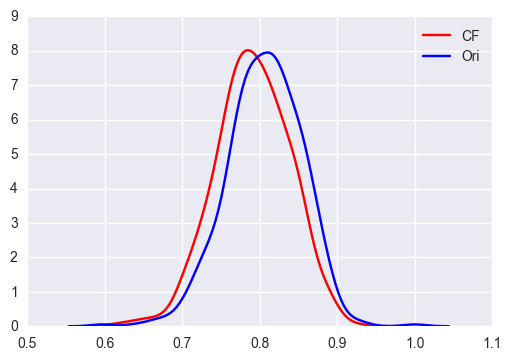

In [68]:
sns.distplot(user_fea[['ave_CF_sim']], bins = 100, color = 'red', hist =False, label = 'CF')
sns.distplot(user_fea[['ave_Ori_sim']], bins = 100, color = 'blue', hist =False, label = 'Ori')

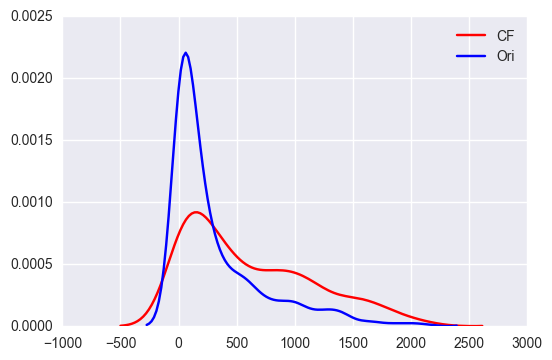

In [69]:
sns.distplot(user_fea[['ave_CF_rank']], bins = 100,color = 'red', hist =False, label = 'CF')
sns.distplot(user_fea[['ave_Ori_rank']], bins = 100,color = 'blue', hist =False, label = 'Ori')